In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
urldata = pd.read_csv('../data/processed_IEEEData.csv')

In [3]:
urldata

,index,url,label
0,30845,belajarprogramming.com/newpaypal/loggy/paypal.htm,1
1,25750,ninedotlabs.com/att2/index.php,1
2,91832,www.almostfabulous.com/youker/,0
3,29165,stbcomputer.com/autodesk/components/www.paypal...,1
4,52012,members.tripod.com/chang.ling/,0
...,...,...,...
95777,86523,www.winehq.com/?interview=14,0
95778,45352,2933517.com/js,1
95779,34852,imajinsmiles.com/Questions.html?cmd=_Questions...,1
95780,7754,thesecondhalfonline.com/wp-includes/js/tinymce...,1


In [3]:
urldata['m_url'] = urldata['url'].apply(lambda i: i)

for x in range(len(urldata['url'])):
    t = urldata['url'][x]
    if not (t.startswith('http://') or t.startswith('https://') or t.startswith('ftp://')):
        urldata['m_url'][x] = 'http://' + urldata['url'][x]

<ipython-input-3-a9de932e6da7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urldata['m_url'][x] = 'http://' + urldata['url'][x]


In [5]:
urldata

,index,url,label,m_url
0,30845,belajarprogramming.com/newpaypal/loggy/paypal.htm,1,http://belajarprogramming.com/newpaypal/loggy/...
1,25750,ninedotlabs.com/att2/index.php,1,http://ninedotlabs.com/att2/index.php
2,91832,www.almostfabulous.com/youker/,0,http://www.almostfabulous.com/youker/
3,29165,stbcomputer.com/autodesk/components/www.paypal...,1,http://stbcomputer.com/autodesk/components/www...
4,52012,members.tripod.com/chang.ling/,0,http://members.tripod.com/chang.ling/
...,...,...,...,...
95777,86523,www.winehq.com/?interview=14,0,http://www.winehq.com/?interview=14
95778,45352,2933517.com/js,1,http://2933517.com/js
95779,34852,imajinsmiles.com/Questions.html?cmd=_Questions...,1,http://imajinsmiles.com/Questions.html?cmd=_Qu...
95780,7754,thesecondhalfonline.com/wp-includes/js/tinymce...,1,http://thesecondhalfonline.com/wp-includes/js/...


In [4]:
#Divide the URL into three parts: (1) subdomain/domain (2) path/file (3) query
#Importing dependencies
from urllib.parse import urlparse
import os.path

#find out the hostname from the url
urldata['hostname'] = urldata['m_url'].apply(lambda i: urlparse(i).netloc)

#find out the path from the url
urldata['path'] = urldata['m_url'].apply(lambda i: urlparse(i).path)

urldata['query'] = urldata['m_url'].apply(lambda i: urlparse(i).query)

In [7]:
urldata

,index,url,label,m_url,hostname,path,query
0,30845,belajarprogramming.com/newpaypal/loggy/paypal.htm,1,http://belajarprogramming.com/newpaypal/loggy/...,belajarprogramming.com,/newpaypal/loggy/paypal.htm,
1,25750,ninedotlabs.com/att2/index.php,1,http://ninedotlabs.com/att2/index.php,ninedotlabs.com,/att2/index.php,
2,91832,www.almostfabulous.com/youker/,0,http://www.almostfabulous.com/youker/,www.almostfabulous.com,/youker/,
3,29165,stbcomputer.com/autodesk/components/www.paypal...,1,http://stbcomputer.com/autodesk/components/www...,stbcomputer.com,/autodesk/components/www.paypal.com/dk/cgi-bin...,
4,52012,members.tripod.com/chang.ling/,0,http://members.tripod.com/chang.ling/,members.tripod.com,/chang.ling/,
...,...,...,...,...,...,...,...
95777,86523,www.winehq.com/?interview=14,0,http://www.winehq.com/?interview=14,www.winehq.com,/,interview=14
95778,45352,2933517.com/js,1,http://2933517.com/js,2933517.com,/js,
95779,34852,imajinsmiles.com/Questions.html?cmd=_Questions...,1,http://imajinsmiles.com/Questions.html?cmd=_Qu...,imajinsmiles.com,/Questions.html,cmd=_Questions&amp;dispatch=5885d80a13c0db1fb6...
95780,7754,thesecondhalfonline.com/wp-includes/js/tinymce...,1,http://thesecondhalfonline.com/wp-includes/js/...,thesecondhalfonline.com,/wp-includes/js/tinymce/remository.utilitie.htm,


In [5]:
urldata['host_path'] = urldata['hostname']+urldata['path']

In [9]:
urldata

,index,url,label,m_url,hostname,path,query,host_path
0,30845,belajarprogramming.com/newpaypal/loggy/paypal.htm,1,http://belajarprogramming.com/newpaypal/loggy/...,belajarprogramming.com,/newpaypal/loggy/paypal.htm,,belajarprogramming.com/newpaypal/loggy/paypal.htm
1,25750,ninedotlabs.com/att2/index.php,1,http://ninedotlabs.com/att2/index.php,ninedotlabs.com,/att2/index.php,,ninedotlabs.com/att2/index.php
2,91832,www.almostfabulous.com/youker/,0,http://www.almostfabulous.com/youker/,www.almostfabulous.com,/youker/,,www.almostfabulous.com/youker/
3,29165,stbcomputer.com/autodesk/components/www.paypal...,1,http://stbcomputer.com/autodesk/components/www...,stbcomputer.com,/autodesk/components/www.paypal.com/dk/cgi-bin...,,stbcomputer.com/autodesk/components/www.paypal...
4,52012,members.tripod.com/chang.ling/,0,http://members.tripod.com/chang.ling/,members.tripod.com,/chang.ling/,,members.tripod.com/chang.ling/
...,...,...,...,...,...,...,...,...
95777,86523,www.winehq.com/?interview=14,0,http://www.winehq.com/?interview=14,www.winehq.com,/,interview=14,www.winehq.com/
95778,45352,2933517.com/js,1,http://2933517.com/js,2933517.com,/js,,2933517.com/js
95779,34852,imajinsmiles.com/Questions.html?cmd=_Questions...,1,http://imajinsmiles.com/Questions.html?cmd=_Qu...,imajinsmiles.com,/Questions.html,cmd=_Questions&amp;dispatch=5885d80a13c0db1fb6...,imajinsmiles.com/Questions.html
95780,7754,thesecondhalfonline.com/wp-includes/js/tinymce...,1,http://thesecondhalfonline.com/wp-includes/js/...,thesecondhalfonline.com,/wp-includes/js/tinymce/remository.utilitie.htm,,thesecondhalfonline.com/wp-includes/js/tinymce...


In [6]:
domainNamesAll = urldata['host_path'].tolist()
i=0
legit=0
phishing=0
for d in domainNamesAll:
    if (urldata['label'][i]==0): 
        legit=legit+1
    if (urldata['label'][i]==1):
        phishing +=1
    i=i+1
legit, phishing

(47891, 47891)

In [7]:
domainNamesAll = urldata['host_path'].tolist()
LEncoder = LabelEncoder()
allCharacters = ''.join(domainNamesAll)
LEncoder.fit(list(allCharacters))
Lencoded_domainNames = []
i=0
Len_legitimate=[]
Len_phishing=[]
Len_DM=[]
for d in domainNamesAll:
    # Split the domain name into a list of characters
    characters = list(d)
    # Encode each character as an integer using the LabelEncoder object
    encoded_characters = LEncoder.transform(characters)
    # Append the encoded characters to the list of encoded domain names
    Len_DM.append(len(encoded_characters))
    if (urldata['label'][i]==0): 
        Len_legitimate.append(len(encoded_characters))
    if (urldata['label'][i]==1):
        Len_phishing.append(len(encoded_characters))
    i=i+1
    if len(encoded_characters) > 500:
        encoded_characters = encoded_characters[:500]
    Lencoded_domainNames.append(encoded_characters)
maxLength = max([len(encoded_domain_name) for encoded_domain_name in Lencoded_domainNames])
maxLength

500

In [39]:
characters = list('www.polyu.edu.hk')
encoded_characters = LEncoder.transform(characters)
encoded_characters

array([80, 80, 80, 11, 73, 72, 69, 82, 78, 11, 62, 61, 78, 11, 65, 68],
      dtype=int64)

In [36]:
Lencoded_domainNames[8]

array([77, 62, 60, 65, 11, 64, 75, 72, 78, 73, 76, 11, 82, 58, 65, 72, 72,
       11, 60, 72, 70, 12, 64, 75, 72, 78, 73, 12, 60, 78, 38, 47, 33, 12],
      dtype=int64)

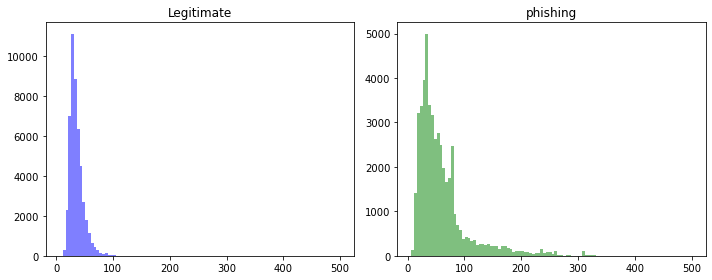

In [21]:
x_min = min(np.min(Len_legitimate), np.min(Len_phishing))
x_max = max(np.max(Len_legitimate), np.max(Len_phishing))

x_max=500
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram 1
axs[0].hist(Len_legitimate, bins=100, range=(x_min, x_max), color='blue', alpha=0.5)
axs[0].set_title('Legitimate')

# Plot histogram 2
axs[1].hist(Len_phishing, bins=100, range=(x_min, x_max), color='green', alpha=0.5)
axs[1].set_title('phishing')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
Len_DM.index(2175)

40568

In [24]:
urldata['host_path'][40568]

'peekaboopoles.co.uk/holding/payza.com/accounts/underhold.hild.frozen/money.hold/unhold.accounts.code/securty.code.code/ewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbmewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbmndsabfmnbdsmnfbndsabfmnbdsmnfdgdfsgfdgdsgfb/ewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbmdsafsdafdsfasdfsdfsdfasndsabfmnbdsmnfb/ewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbsdafsadfadsfsafsdafdsfsadvvmndsabfmnbdsmnfb/ewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbsdafsadfadsfsafsdafdsfsadvvmndsabfmnbdsmnfb/eewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbsdafsadfadsfsafsdafdsfsadvvmndsabfmnbdsmnfbwrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbsdafsadfadsfsafsdafdsfsadvvmn/eew

In [8]:
num_unique_chars = len(LEncoder.classes_)
num_unique_chars

88

In [9]:
LEncoder.classes_

array([' ', '!', '$', '%', '&', '(', ')', '*', '+', ',', '-', '.', '/',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=',
       '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
       'Z', '[', '\\', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~'], dtype='<U1')

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(Lencoded_domainNames, maxlen = maxLength)

In [10]:
Y = urldata['label']

In [14]:
len(X), len(Y)

(95782, 95782)

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
Xtrain.shape, len(ytrain)

((76625, 500), 76625)

In [17]:
Xtest.shape, len(ytest)

((19157, 500), 19157)

In [12]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, concatenate
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D, Input, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import GaussianNoise

In [13]:
vocab_size = num_unique_chars

In [14]:
def model(max_length, vocab_size, output_dim, filter_sizes, num_filters, dropout_rate, dense_units):
    embed_input = Input(shape=(max_length,))
    x = Embedding(vocab_size, output_dim, input_length=max_length)(embed_input)
    
#    noise = GaussianNoise(0.5)(x)
    
#    drop = SpatialDropout1D(dropout_rate)(noise)
    pooled_outputs = []
    for i in range(len(filter_sizes)):
        conv = Conv1D(num_filters, kernel_size=filter_sizes[i], padding='same', activation='relu')(x)
        conv = Flatten()(conv)           
        pooled_outputs.append(conv)
        
    
#    flat = Flatten()(noise)
#    pooled_outputs.append(flat)
    
    if (len(filter_sizes)==1):
        merge = pooled_outputs
    else:
        merge = concatenate(pooled_outputs)
    
    drop = Dropout(dropout_rate)(merge)
    
    dense_1 = Dense(dense_units, activation='relu')(drop)
    dense_2 = Dense(dense_units, activation='relu')(dense_1)
    dense_3 = Dense(dense_units, activation='relu')(dense_2)
    out = Dense(1, activation='sigmoid')(dense_3)
    
    model = Model(inputs=embed_input, outputs=out)
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    print(model.summary())
    return model

import time
start=time.time()
model = model(maxLength, vocab_size, 48, [3,4], 256, 0.4, 128)
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=10, verbose=1) 

print('time for training the model = {:.0f} sec'.format(time.time()-start))
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))
print('Test Loss: %f' % (loss*100))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 48)      4224        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 500, 256)     37120       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 500, 256)     49408       embedding[0][0]                  
______________________________________________________________________________________________

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(Xtest)
print(confusion_matrix(ytest, np.rint(y_pred)))

[[9281  306]
 [ 324 9246]]


In [16]:
model.save("../saved_models/Char-CNN_iter10.h5")